In [86]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy.sparse.linalg import inv
from scipy.linalg import svd
from scipy.sparse import csc_matrix
from scipy.stats import chi2
from BCG_CG_ichol import BCG, conjugate_grad, ichol
import seaborn as sns
%matplotlib inline

In [6]:
A_csc = loadmat('sparse_matrix.mat')['spmat']
L = ichol(A_csc.toarray())
L = csc_matrix(L)
P = L.dot(L.T)
print(np.linalg.norm(P.toarray()-A_csc.toarray()))

5.27075007834948


# Choose preconditioner

In [7]:
invP = inv(P).toarray()
invA = inv(A_csc).toarray()
eye_mat = np.eye(100)

# Trace Error

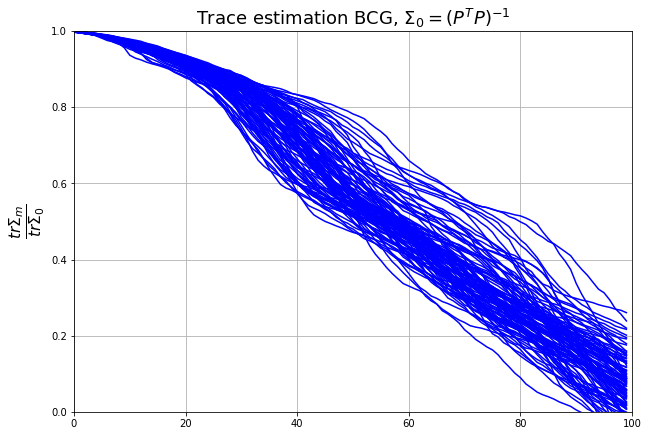

In [46]:
plt.figure(figsize=(10, 7))
trace_P = []
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), invP, 
          10^(-4), 100)
    _, _, _, _, trace_est = bcg.bcg(x)
    trace_P.append(trace_est)
    plt.plot(trace_est, color='blue')
    plt.title(r'Trace estimation BCG, $\Sigma_0 = (P^{T}P)^{-1}$', fontsize=18);
    plt.ylabel(r'$\frac{tr \Sigma_m}{tr \Sigma_0}$', fontsize=22);
    
plt.ylim([0, 1]);
plt.xlim([0, 100]);
plt.grid(True)

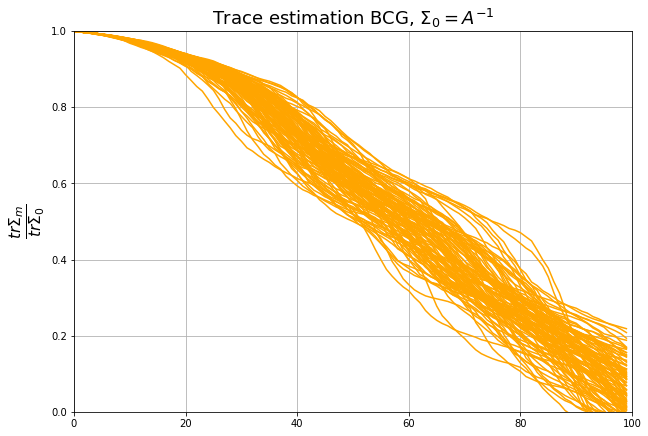

In [47]:
plt.figure(figsize=(10, 7))
trace_A = []
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), invA, 
          10^(-4), 100)
    _, _, _, _, trace_est = bcg.bcg(x)
    trace_A.append(trace_est)
    plt.plot(trace_est, color='orange')
    plt.title(r'Trace estimation BCG, $\Sigma_0 = A^{-1}$', fontsize=18);
    plt.ylabel(r'$\frac{tr \Sigma_m}{tr \Sigma_0}$', fontsize=22);
    
plt.ylim([0, 1]);
plt.xlim([0, 100]);
plt.grid(True)

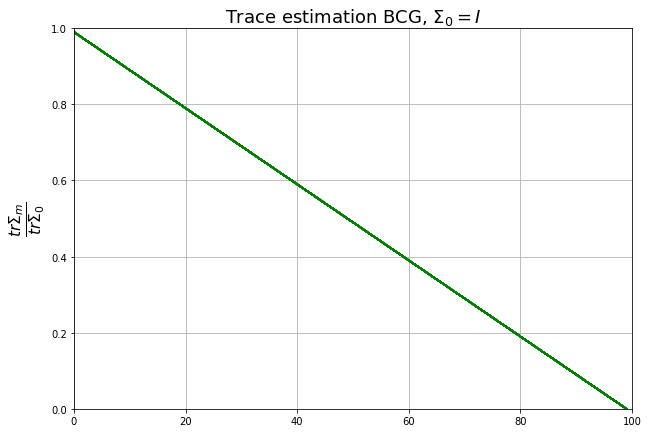

In [48]:
plt.figure(figsize=(10, 7))
trace_I = []
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), eye_mat, 
          10^(-4), 100)
    _, _, _, _, trace_est = bcg.bcg(x)
    plt.plot(trace_est, color='green')
    trace_I.append(trace_est)
    plt.title(r'Trace estimation BCG, $\Sigma_0 = I$', fontsize=18);
    plt.ylabel(r'$\frac{tr \Sigma_m}{tr \Sigma_0}$', fontsize=22);
plt.ylim([0, 1]);
plt.xlim([0, 100]);
plt.grid(True)

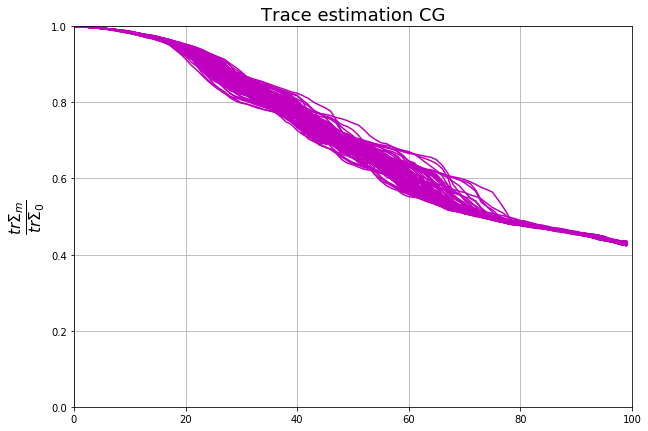

In [35]:
plt.figure(figsize=(10, 7))
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    _, _, tr_err = conjugate_grad(A_csc.toarray(), b, 100, x)
    
    plt.plot(tr_err, color='m')
    plt.title(r'Trace estimation CG', fontsize=18);
    plt.ylabel(r'$\frac{tr \Sigma_m}{tr \Sigma_0}$', fontsize=22);
plt.ylim([0, 1]);
plt.xlim([0, 100]);
plt.grid(True)

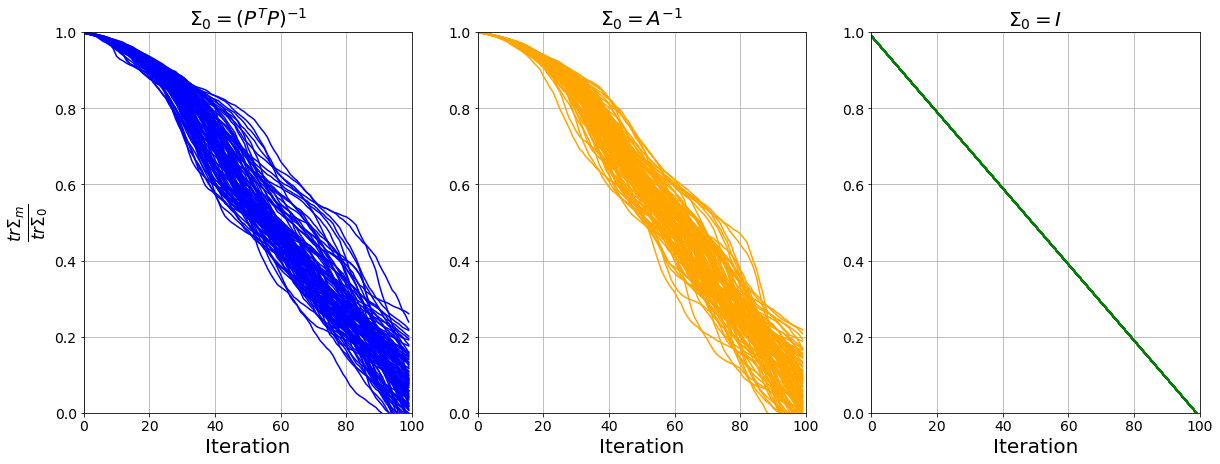

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (20, 7))
for i in range(100):
    ax[0].plot(trace_P[i], color = 'blue')
    ax[1].plot(trace_A[i], color = 'orange')
    ax[2].plot(trace_I[i], color = 'green')
    
ax[0].set_title(r'$\Sigma_0 = (P^{T}P)^{-1}$', fontsize=20)
ax[1].set_title(r'$\Sigma_0 = A^{-1}$', fontsize=20)
ax[2].set_title(r'$\Sigma_0 = I$', fontsize=20)
ax[0].set_ylabel(r'$\frac{tr \Sigma_m}{tr \Sigma_0}$', fontsize=24);
for i in range(3):
    ax[i].set_ylim([0, 1]);
    ax[i].set_xlim([0, 100]);
    ax[i].grid(True)
    ax[i].set_xlabel('Iteration', fontsize=20)
    for tick in ax[i].xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
    for tick in ax[i].yaxis.get_major_ticks():
                tick.label.set_fontsize(14)

#plt.savefig('traces_est', dpi=600)

# Point estimation

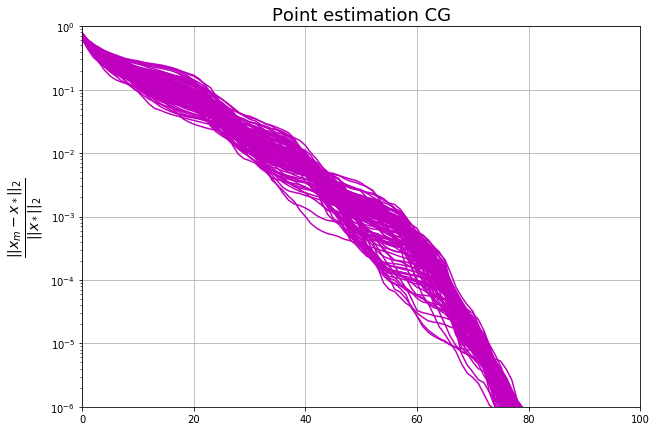

In [64]:
plt.figure(figsize=(10, 7))
point_CG = []
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    _, rel_err, _ = conjugate_grad(A_csc.toarray(), b, 100, x)
    point_CG.append(rel_err)
    plt.semilogy(rel_err, color='m')
    plt.title(r'Point estimation CG', fontsize=18);
    plt.ylabel(r'$\frac{|| x_m - x_*||_2}{|| x_*||_2}$', fontsize=20);
plt.ylim([10**(-6), 1]);
plt.xlim([0, 100]);
plt.grid(True)

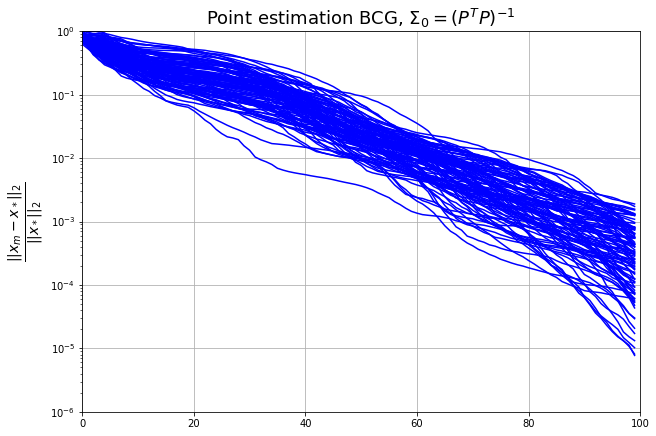

In [65]:
plt.figure(figsize=(10, 7))
point_P = []
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), invP, 
          10^(-4), 100)
    _, _, _, point_est, _ = bcg.bcg(x)
    point_P.append(point_est)
    plt.semilogy(point_est, color='blue')
    plt.title(r'Point estimation BCG, $\Sigma_0 = (P^{T}P)^{-1}$', fontsize=18);
    plt.ylabel(r'$\frac{|| x_m - x_*||_2}{|| x_*||_2}$', fontsize=20)
plt.ylim([10**(-6), 1]);
plt.xlim([0, 100]);
plt.grid(True)

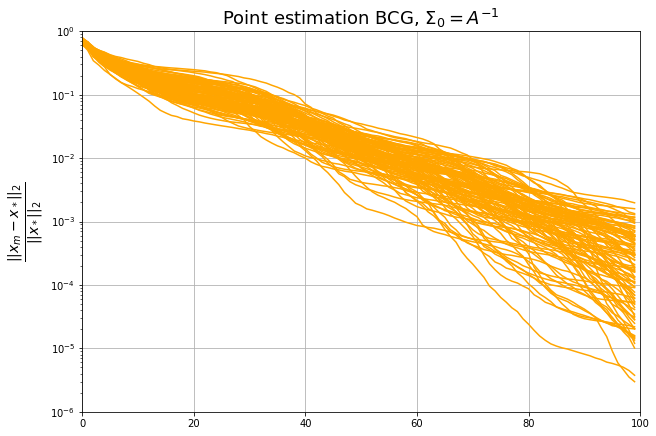

In [66]:
plt.figure(figsize=(10, 7))
point_A = []
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), invA, 
          10^(-4), 100)
    _, _, _, point_est, _ = bcg.bcg(x)
    point_A.append(point_est)
    plt.semilogy(point_est, color='orange')
    plt.title(r'Point estimation BCG, $\Sigma_0 = A^{-1}$', fontsize=18);
    plt.ylabel(r'$\frac{|| x_m - x_*||_2}{|| x_*||_2}$', fontsize=20)
plt.ylim([10**(-6), 1]);
plt.xlim([0, 100]);
plt.grid(True)

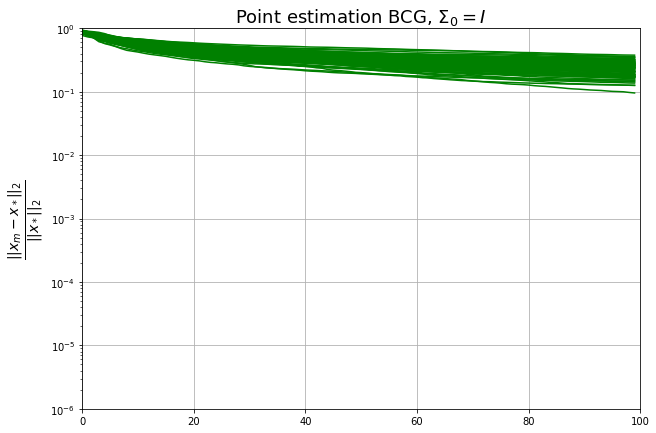

In [67]:
plt.figure(figsize=(10, 7))
point_I = []
for i in range(100):
    np.random.seed(i) #58
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), eye_mat, 
          10^(-4), 100)
    _, _, _, point_est, _ = bcg.bcg(x)
    point_I.append(point_est)
    plt.semilogy(point_est, color='green')
    plt.title(r'Point estimation BCG, $\Sigma_0 = I$', fontsize=18);
    plt.ylabel(r'$\frac{|| x_m - x_*||_2}{|| x_*||_2}$', fontsize=20);
plt.ylim([10**(-6), 1]);
plt.xlim([0, 100]);
plt.grid(True)

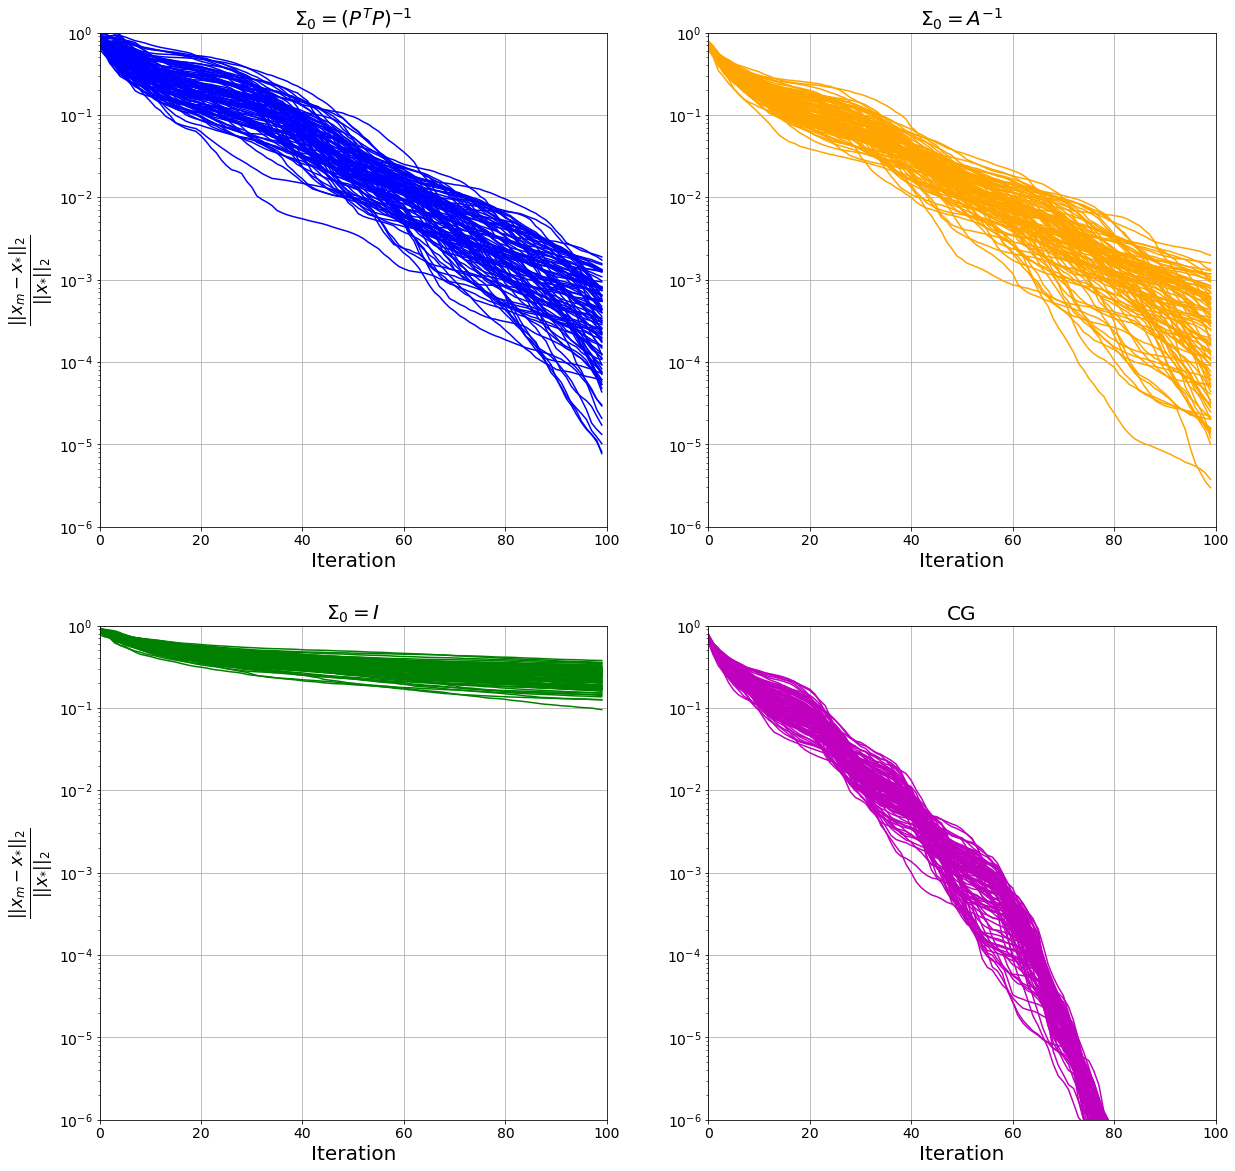

In [69]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (20, 20))
for i in range(100):
    ax[0, 0].semilogy(point_P[i], color = 'blue')
    ax[0, 1].semilogy(point_A[i], color = 'orange')
    ax[1, 0].semilogy(point_I[i], color = 'green')
    ax[1, 1].semilogy(point_CG[i], color = 'm')
    
ax[0, 0].set_title(r'$\Sigma_0 = (P^{T}P)^{-1}$', fontsize=20)
ax[0, 1].set_title(r'$\Sigma_0 = A^{-1}$', fontsize=20)
ax[1, 0].set_title(r'$\Sigma_0 = I$', fontsize=20)
ax[1, 1].set_title('CG', fontsize=20)

ax[0, 0].set_ylabel(r'$\frac{|| x_m - x_{*}||_2}{|| x_{*}||_2}$', fontsize=24);
ax[1, 0].set_ylabel(r'$\frac{|| x_m - x_{*}||_2}{|| x_{*}||_2}$', fontsize=24);
for i in range(2):
    for j in range(2):
        ax[i, j].set_ylim([10**(-6), 1]);
        ax[i, j].set_xlim([0, 100]);
        ax[i, j].grid(True)
        ax[i, j].set_xlabel('Iteration', fontsize=20)
        for tick in ax[i, j].xaxis.get_major_ticks():
                    tick.label.set_fontsize(14) 
        for tick in ax[i, j].yaxis.get_major_ticks():
                    tick.label.set_fontsize(14)

#plt.savefig('point_est', dpi=600)

# Uncertainty Quantification

In [16]:
m_max=10
test_iter = 500
z_P = np.zeros(test_iter)
d = A_csc.shape[0]
for i in range(test_iter):
    np.random.seed(i) 
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), invP, 
          10^(-4), m_max)
    res_x, Sigma, _, _, _ = bcg.bcg(x)
    U, D, _ = svd(Sigma)
    D_sqrt = np.diag(np.sqrt(1./D[:d-m_max]))
    z_P[i] = np.linalg.norm(D_sqrt.dot(U[:, :d-m_max].T.dot(x-res_x)))

In [17]:
m_max=10
test_iter = 500
z_A = np.zeros(test_iter)
d = A_csc.shape[0]
for i in range(test_iter):
    np.random.seed(i) 
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), invA, 
          10^(-4), m_max)
    res_x, Sigma, _, _, _ = bcg.bcg(x)
    U, D, _ = svd(Sigma)
    D_sqrt = np.diag(np.sqrt(1./D[:d-m_max]))
    z_A[i] = np.linalg.norm(D_sqrt.dot(U[:, :d-m_max].T.dot(x-res_x)))

In [18]:
m_max=10
test_iter = 500
z_I = np.zeros(test_iter)
d = A_csc.shape[0]
for i in range(test_iter):
    np.random.seed(i) 
    x = np.random.randn(A_csc.shape[0],1)
    b = A_csc.dot(x)
    bcg = BCG(A_csc.toarray(), b, np.zeros((100, 1)), eye_mat, 
          10^(-4), m_max)
    res_x, Sigma, _, _, _ = bcg.bcg(x)
    U, D, _ = svd(Sigma)
    D_sqrt = np.diag(np.sqrt(1./D[:d-m_max]))
    z_I[i] = np.linalg.norm(D_sqrt.dot(U[:, :d-m_max].T.dot(x-res_x)))

In [19]:
r = chi2.rvs(d-m_max, size=500)

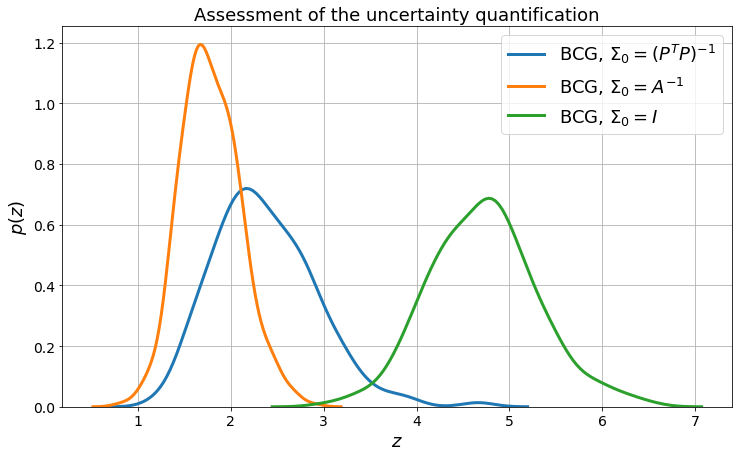

In [84]:
plt.figure(figsize = (12, 7))
sns.distplot(z_P, hist=False, label = r'BCG, $\Sigma_0 = (P^TP)^{-1}$', kde_kws=dict(linewidth=3))
sns.distplot(z_A, hist=False, label = r'BCG, $\Sigma_0 = A^{-1}$', kde_kws=dict(linewidth=3))
sns.distplot(z_I, hist=False, label = r'BCG, $\Sigma_0 = I$', kde_kws=dict(linewidth=3))

plt.title('Assessment of the uncertainty quantification', fontsize=18)
plt.legend(fontsize=18);
plt.legend(fontsize=18);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.grid(True);
plt.xlabel(r'$z$', fontsize=18)
plt.ylabel(r'$p(z)$', fontsize=18);
#plt.savefig('UQ1', dpi=600)

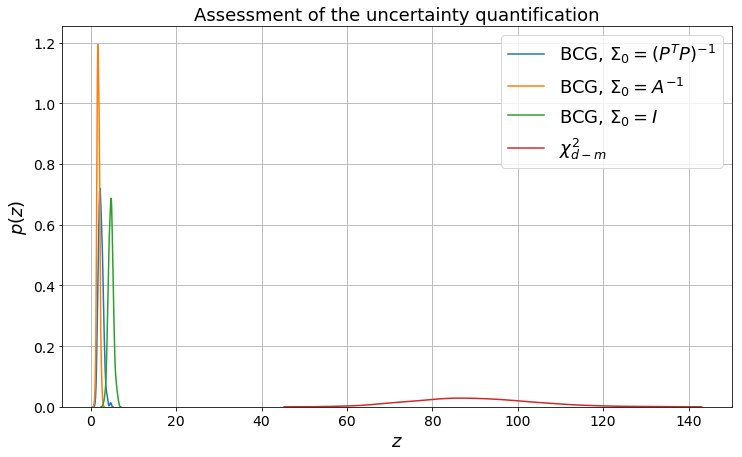

In [85]:
plt.figure(figsize = (12, 7))
sns.distplot(z_P, hist=False, label = r'BCG, $\Sigma_0 = (P^TP)^{-1}$', kde_kws=dict(linewidth=1.5))
sns.distplot(z_A, hist=False, label = r'BCG, $\Sigma_0 = A^{-1}$', kde_kws=dict(linewidth=1.5))
sns.distplot(z_I, hist=False, label = r'BCG, $\Sigma_0 = I$', kde_kws=dict(linewidth=1.5))
sns.distplot(r, hist=False, label = r'$ \chi^2_{d-m} $', kde_kws=dict(linewidth=1.5))
plt.title('Assessment of the uncertainty quantification', fontsize=18)
plt.legend(fontsize=18);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.grid(True);
plt.xlabel(r'$z$', fontsize=18)
plt.ylabel(r'$p(z)$', fontsize=18);
#plt.savefig('UQ2', dpi=600)